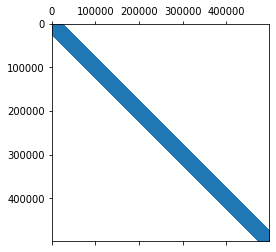

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as la

 ####################################### 4.(b)(c) ####################################### 
# initialization 
Nx = 1000
Ny = 500
h = 1/Ny
hx = h
hy = h

#create Dx and Dy
Dx = 1/hx*sp.diags([1, -1], [0, -1], shape=(Nx, Nx-1)).toarray()
Dy = 1/hy*sp.diags([1, -1], [0, -1], shape=(Ny, Ny-1)).toarray()

#calculate Axx Ayy
Lxx =Dx.transpose().dot(Dx)
Lyy =Dy.transpose().dot(Dy)

#create Lxx and Lyy
Ix = sp.eye(Nx-1)
Iy = sp.eye(Ny-1)

#compute the sparse 2D Laplacian
A = sp.kron(Iy,Lxx)+sp.kron(Lyy,Ix)
plt.spy(A)
plt.show()
plt.close()



[[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 1.53892643e-17 -1.18432720e-03 -2.36854921e-03 ... -2.36854921e-03
  -1.18432720e-03 -6.15570572e-17]
 [ 3.07779210e-17 -2.36860765e-03 -4.73700490e-03 ... -4.73700490e-03
  -2.36860765e-03 -1.23111684e-16]
 ...
 [ 3.07779210e-17 -2.36860765e-03 -4.73700490e-03 ... -4.73700490e-03
  -2.36860765e-03 -1.23111684e-16]
 [ 1.53892643e-17 -1.18432720e-03 -2.36854921e-03 ... -2.36854921e-03
  -1.18432720e-03 -6.15570572e-17]
 [ 2.99951957e-31 -2.30837066e-17 -4.61653627e-17 ... -4.61653627e-17
  -2.30837066e-17 -1.19980783e-30]]


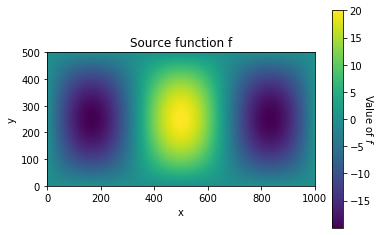

In [2]:
 ####################################### 4.(d)(e) ####################################### 
#build meshgrid
x = np.linspace(0, 2, Nx+1)
y = np.linspace(0, 1, Ny+1)
xv, yv = np.meshgrid(x, y, sparse=True) #xv is row vector, yv is column vector

#compute the source function
f = 20*np.sin(np.pi*yv)*np.sin(1.5*np.pi*xv+np.pi)
print(f)

#plot for the source function f
plt.xlabel("x")
plt.ylabel("y")
plt.title("Source function f")
plt.imshow(f)
plt.gca().invert_yaxis()
cb = plt.colorbar()
cb.set_label('Value of $f$', rotation=270)
plt.show()
plt.close()

In [3]:
 ####################################### 4.(f) ####################################### 
#Building the BC
yv1 = yv[1:Ny]
xv1 = xv[0,1:Nx]
u_l =  np.sin(2*np.pi*yv1) #BC at left, column vector
u_r = np.sin(2*np.pi*yv1)   #BC at right, column vector
u_b = np.sin(0.5*np.pi*xv1) #BC at bottom, row vector
u_t = 0*xv1  #BC at top, row vector

#Boardcasting the BC into a 2D array
u_bc = np.zeros((Ny-1,Nx-1))
u_bc[0,:] = u_b
u_bc[Ny-2,:] = u_t
u_bc[1:Ny-2,[0]] = u_l[1:Ny-2]
u_bc[1:Ny-2,[Nx-2]] = u_r[1:Ny-2]

# 4 corner inner points has 2 terms
u_bc[0,0] = u_bc[0,0]+u_l[0]
u_bc[0,Nx-2] = u_bc[0,Nx-2]+u_r[0]
u_bc[Ny-2,0] = u_bc[Ny-2,0]+u_l[Ny-2]
u_bc[Ny-2,Nx-2] = u_bc[Ny-2,Nx-2]+u_r[Ny-2]

#rule out BC in f, to size(Nx-1,Ny-1)
f_nobc = f
f_nobc = np.delete(f_nobc,Ny,0)
f_nobc = np.delete(f_nobc,0,0)
f_nobc = np.delete(f_nobc,Nx,1)
f_nobc = np.delete(f_nobc,0,1) #size(Nx-1,Ny-1)
print(f_nobc)  

#form the 2D RHS
RHS = f_nobc+(1/h**2)*u_bc
print(RHS)


[[-0.00118433 -0.00236855 -0.00355256 ... -0.00355256 -0.00236855
  -0.00118433]
 [-0.00236861 -0.004737   -0.00710498 ... -0.00710498 -0.004737
  -0.00236861]
 [-0.00355279 -0.00710527 -0.01065712 ... -0.01065712 -0.00710527
  -0.00355279]
 ...
 [-0.00355279 -0.00710527 -0.01065712 ... -0.01065712 -0.00710527
  -0.00355279]
 [-0.00236861 -0.004737   -0.00710498 ... -0.00710498 -0.004737
  -0.00236861]
 [-0.00118433 -0.00236855 -0.00355256 ... -0.00355256 -0.00236855
  -0.00118433]]
[[ 3.92690566e+03  1.57078362e+03  2.35615606e+03 ...  2.35615606e+03
   1.57078362e+03  3.92690566e+03]
 [ 6.28252149e+03 -4.73700490e-03 -7.10498139e-03 ... -7.10498139e-03
  -4.73700490e-03  6.28252149e+03]
 [ 9.42254211e+03 -7.10527359e-03 -1.06571215e-02 ... -1.06571215e-02
  -7.10527359e-03  9.42254211e+03]
 ...
 [-9.42254922e+03 -7.10527359e-03 -1.06571215e-02 ... -1.06571215e-02
  -7.10527359e-03 -9.42254922e+03]
 [-6.28252623e+03 -4.73700490e-03 -7.10498139e-03 ... -7.10498139e-03
  -4.73700490e-03

In [4]:
 ####################################### 4.(g) ####################################### 
RHS = np.reshape(RHS,((Nx-1)*(Ny-1)))
print(RHS)

[ 3.92690566e+03  1.57078362e+03  2.35615606e+03 ... -3.55256082e-03
 -2.36854921e-03 -3.14151116e+03]


(498501, 498501)
(498501,)


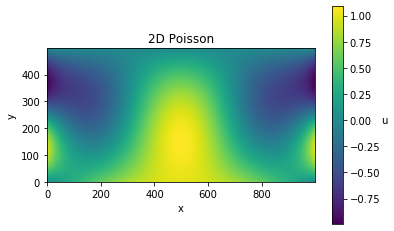

In [5]:
 ####################################### 4.(g) ####################################### 
#solve the eq
print(A.shape)
print(RHS.shape)
u = la.spsolve(A,RHS)

#reshape
u = np.reshape(u, (Ny-1,Nx-1))

#plot for the source function f
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Poisson")
plt.imshow(u)
plt.gca().invert_yaxis()
cb = plt.colorbar()
cb.set_label('u', rotation=0)
plt.show()
plt.close()